In [1]:
#from google.colab import drive

#drive.mount("/content/gdrive")

In [2]:
from dask import dataframe as dd
import time

start = time.time()
dask_df = dd.read_csv("/Users/kashyapava/Desktop/UIUC/SEM_1/CS 412/Project/US_Accidents_March23.csv").compute()
end = time.time()
print("Read csv with dask: ",(end-start),"sec")

Read csv with dask:  32.2766900062561 sec


In [3]:
dask_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
dask_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728394 entries, 0 to 173289
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)            f

In [5]:
dask_df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
state_to_timezone = dask_df.groupby('State')['Timezone'].first().to_dict()

In [7]:
state_to_timezone

{'AL': 'US/Central',
 'AR': 'US/Central',
 'AZ': 'US/Mountain',
 'CA': 'US/Pacific',
 'CO': 'US/Mountain',
 'CT': 'US/Eastern',
 'DC': 'US/Eastern',
 'DE': 'US/Eastern',
 'FL': 'US/Eastern',
 'GA': 'US/Eastern',
 'IA': 'US/Central',
 'ID': 'US/Pacific',
 'IL': 'US/Central',
 'IN': 'US/Central',
 'KS': 'US/Central',
 'KY': 'US/Eastern',
 'LA': 'US/Pacific',
 'MA': 'US/Eastern',
 'MD': 'US/Eastern',
 'ME': 'US/Eastern',
 'MI': 'US/Eastern',
 'MN': 'US/Central',
 'MO': 'US/Central',
 'MS': 'US/Central',
 'MT': 'US/Pacific',
 'NC': 'US/Eastern',
 'ND': 'US/Central',
 'NE': 'US/Central',
 'NH': 'US/Eastern',
 'NJ': 'US/Eastern',
 'NM': 'US/Mountain',
 'NV': 'US/Pacific',
 'NY': 'US/Eastern',
 'OH': 'US/Eastern',
 'OK': 'US/Central',
 'OR': 'US/Pacific',
 'PA': 'US/Eastern',
 'RI': 'US/Eastern',
 'SC': 'US/Eastern',
 'SD': 'US/Central',
 'TN': 'US/Eastern',
 'TX': 'US/Central',
 'UT': 'US/Mountain',
 'VA': 'US/Eastern',
 'VT': 'US/Eastern',
 'WA': 'US/Pacific',
 'WI': 'US/Central',
 'WV': 'U

In [8]:
dask_df['Timezone'] = dask_df['State'].map(state_to_timezone)

In [9]:
dask_df['Timezone'].isnull().sum()

0

In [10]:
dask_df = dask_df.dropna(thresh=40)

In [11]:
dask_df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3346078
End_Lng                  3346078
Distance(mi)                   0
Description                    5
Street                     10591
City                         168
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)             24561
Wind_Chill(F)            1852756
Humidity(%)                34809
Pressure(in)                9101
Visibility(mi)             33788
Wind_Direction             43795
Wind_Speed(mph)           425726
Precipitation(in)        2068414
Weather_Condition          30532
Amenity                        0
Bump      

In [12]:
state_to_airport = dask_df.groupby('State')['Airport_Code'].first().to_dict()

In [13]:
dask_df['Airport_Code'] = dask_df['State'].map(state_to_airport)

In [14]:
dask_df.fillna(method='ffill', limit=5, inplace=True)
dask_df.fillna(method='bfill', limit=5, inplace=True)

/var/folders/hc/jqzdg0t12dgdykygfss25mc80000gn/T/ipykernel_14946/40674042.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dask_df.fillna(method='ffill', limit=5, inplace=True)
/var/folders/hc/jqzdg0t12dgdykygfss25mc80000gn/T/ipykernel_14946/40674042.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dask_df.fillna(method='bfill', limit=5, inplace=True)


In [15]:
dask_df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3346073
End_Lng                  3346073
Distance(mi)                   0
Description                    0
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1385465
Humidity(%)                    0
Pressure(in)                   9
Visibility(mi)                 7
Wind_Direction                 2
Wind_Speed(mph)             6388
Precipitation(in)        1334078
Weather_Condition              0
Amenity                        0
Bump      

In [16]:
dask_df.drop(columns=['End_Lat', 'End_Lng'],inplace= True)
dask_df.dropna(subset=['Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)'],inplace = True)

In [17]:
dask_df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             9
Visibility(mi)           7
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [18]:
# check for the imbalance in the data
dask_df['Severity'].value_counts()

Severity
2    4890121
3     726683
4     151904
1      65834
Name: count, dtype: int64

In [19]:
# print the column names
dask_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [20]:
# print the first few time values
dask_df['Start_Time'].head()

0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object

In [21]:
# display all the unique values in the column 'Start_Time'
dask_df['Start_Time'].unique()

array(['2016-02-08 05:46:00', '2016-02-08 06:07:59',
       '2016-02-08 06:49:27', ..., '2019-08-23 19:11:30',
       '2019-08-23 19:00:21', '2019-08-23 18:52:06'], dtype=object)

In [22]:
# Second value is the month
# Access the month value
from datetime import datetime
import pandas as pd
time_dask_df = pd.Series(dask_df['Start_Time'])
time_dask_df = time_dask_df.str.slice(0,10)
time_dask_df = pd.to_datetime(time_dask_df,errors='coerce')
months = time_dask_df.dt.month

In [23]:
# add a new column 'Month' to the dataframe
dask_df['Month'] = months

In [24]:
# assign the four seasons based on the month value
dask_df['Season'] = 'Winter'
dask_df.loc[dask_df['Month'].isin([3,4,5]),'Season'] = 'Spring'
dask_df.loc[dask_df['Month'].isin([6,7,8]),'Season'] = 'Summer'
dask_df.loc[dask_df['Month'].isin([9,10,11]),'Season'] = 'Fall'

In [25]:
# check for null values
print(dask_df.isnull().sum())
print(dask_df.shape)

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             9
Visibility(mi)           7
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [26]:
# count the data points in each season
dask_df['Season'].value_counts()

Season
Winter    1832435
Fall      1513142
Spring    1301660
Summer    1187305
Name: count, dtype: int64

In [27]:
# count severity values in each season
dask_df.groupby('Season')['Severity'].value_counts()

Season  Severity
Fall    2           1310228
        3            164413
        4             35730
        1              2771
Spring  2           1042968
        3            190068
        4             38016
        1             30608
Summer  2            942667
        3            180642
        4             32001
        1             31995
Winter  2           1594258
        3            191560
        4             46157
        1               460
Name: count, dtype: int64

In [28]:
# display all the column names
dask_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Month', 'Season'],
      dtype='object')

In [29]:
# check for the imbalance in the data
dask_df['Severity'].value_counts()

Severity
2    4890121
3     726683
4     151904
1      65834
Name: count, dtype: int64

In [30]:
# check the ratio of severity values
(dask_df['Severity'].value_counts()/dask_df.shape[0])*100

Severity
2    83.813280
3    12.454842
4     2.603529
1     1.128349
Name: count, dtype: float64

In [31]:
# create new data frame
dask_df_new = dask_df
# drop the severity 1 data points
dask_df_new = dask_df_new[dask_df_new['Severity']!=1]
# check the count of severity values
print(dask_df_new['Severity'].value_counts())
# store the severity 1 and severity 4 data points in a new dataframe
dask_df_1 = dask_df[dask_df['Severity']==1]

Severity
2    4890121
3     726683
4     151904
Name: count, dtype: int64


In [32]:
# undersample the new data frame data_df_new
# use randomunder sampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto',random_state=412)

# split the data into features and target
X = dask_df_new.drop(columns=['Severity'])
y = dask_df_new['Severity']

# perform undersampling
X_res, y_res = rus.fit_resample(X, y)

# check the count of severity values
print(y_res.value_counts())

Severity
2    151904
3    151904
4    151904
Name: count, dtype: int64


In [33]:
# form a new data frame with the undersampled data
dask_df_new = pd.DataFrame(X_res,columns=X.columns)
dask_df_new['Severity'] = y_res

# add the severity 1 data points to the new data frame
import pandas as pd
dask_df_new = pd.concat([dask_df_new,dask_df_1],axis=0)

# check the count of severity values
print(dask_df_new['Severity'].value_counts())

# print the head of the data frame
dask_df_new.head()

Severity
2    151904
3    151904
4    151904
1     65834
Name: count, dtype: int64


,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Season,Severity
79249,A-1470157,Source3,2020-05-14 19:51:44,2020-05-14 20:46:51,34.774570,-118.502007,0.000,Accident on CA-138 Avenue D at 210th St.,210th St W,Lancaster,...,False,False,False,Night,Day,Day,Day,5,Spring,2
45989,A-5408062,Source1,2022-10-10 16:12:28.000000000,2022-10-10 16:25:03.000000000,35.027043,-85.366570,1.309,Slow traffic on I-24 W from Browns Ferry Rd/Ex...,I-24,Chattanooga,...,False,False,False,Day,Day,Day,Day,10,Fall,2
162379,A-7593193,Source1,2018-04-12 06:42:14,2018-04-12 12:42:14,34.005980,-117.961030,0.205,At Hacienda Blvd - Accident. Lane blocked.,Pomona Fwy W,Hacienda Heights,...,False,False,False,Day,Day,Day,Day,4,Spring,2
18574,A-3847115,Source1,2022-09-23 16:28:41,2022-09-23 17:43:42,37.524482,-77.336083,0.071,Incident on SPRINGER DR near GILMOUR RD Drive ...,Springer Dr,Sandston,...,False,False,False,Day,Day,Day,Day,9,Fall,2
60358,A-3735454,Source1,2022-04-20 17:30:04.000000000,2022-04-20 18:46:35.000000000,29.993915,-90.094649,0.860,Incident on I-610 WB near ST BERNARD AVE EXIT ...,I-610 W,New Orleans,...,False,False,False,Day,Day,Day,Day,4,Spring,2


In [63]:
# undersample the data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto',random_state=412)

# split the data into features and labels
X = dask_df.drop(columns=['Severity'])
y = dask_df['Severity']

# perform undersampling
X_res_2, y_res_2 = rus.fit_resample(X, y)

# check the count of severity values
print(y_res_2.value_counts())

Severity
1    65834
2    65834
3    65834
4    65834
Name: count, dtype: int64


In [35]:
# Undersampling strategy 1 
df_und_1 = dask_df_new

# Undersampling strategy 2 - using X_res and y_res
df_und_2 = pd.DataFrame(X_res_2,columns=X.columns)
df_und_2['Severity'] = y_res_2
df_und_2.shape

# Undersampling strategy 3
# Bring the severity 2 to the severity 3 level
df_und_3 = dask_df_new
# store and drop severity 3 data points
df_und_3_3 = df_und_3[df_und_3['Severity']==3]
df_und_3 = df_und_3[df_und_3['Severity']!=3]
# store and drop severity 4 data points
df_und_3_4 = df_und_3[df_und_3['Severity']==4]
df_und_3 = df_und_3[df_und_3['Severity']!=4]

# undersample the severity 2 data points
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto',random_state=412)
# split the data into features and labels
X = df_und_3.drop(columns=['Severity'])
y = df_und_3['Severity']
# perform undersampling
X_res, y_res = rus.fit_resample(X, y)
# check the count of severity values
print(y_res.value_counts())

# form a new data frame with the undersampled data
df_und_3 = pd.DataFrame(X_res,columns=X.columns)
df_und_3['Severity'] = y_res

# add the severity 3 and severity 4 data points to the new data frame
df_und_3 = pd.concat([df_und_3,df_und_3_3,df_und_3_4],axis=0)

# check the count of severity values
print(df_und_3['Severity'].value_counts())

print(df_und_3_3.shape)

Severity
1    65834
2    65834
Name: count, dtype: int64
Severity
3    151904
4    151904
1     65834
2     65834
Name: count, dtype: int64
(151904, 46)


In [36]:
# Checking the three undersampled data frames
# Undersampling strategy 1
print(df_und_1['Severity'].value_counts())
# Undersampling strategy 2
print(df_und_2['Severity'].value_counts())
# Undersampling strategy 3
print(df_und_3['Severity'].value_counts())

Severity
2    151904
3    151904
4    151904
1     65834
Name: count, dtype: int64
Severity
1    65834
2    65834
3    65834
4    65834
Name: count, dtype: int64
Severity
3    151904
4    151904
1     65834
2     65834
Name: count, dtype: int64


In [37]:
# display the features for all the three undersampled data frames
print(df_und_1.columns)
print(df_und_2.columns)
print(df_und_3.columns)

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Month', 'Season', 'Severity'],
      dtype='object')
Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Ch

In [38]:
# head of the undersampled data frames
print(df_und_1.head())

               ID   Source                     Start_Time  \
79249   A-1470157  Source3            2020-05-14 19:51:44   
45989   A-5408062  Source1  2022-10-10 16:12:28.000000000   
162379  A-7593193  Source1            2018-04-12 06:42:14   
18574   A-3847115  Source1            2022-09-23 16:28:41   
60358   A-3735454  Source1  2022-04-20 17:30:04.000000000   

                             End_Time  Start_Lat   Start_Lng  Distance(mi)  \
79249             2020-05-14 20:46:51  34.774570 -118.502007         0.000   
45989   2022-10-10 16:25:03.000000000  35.027043  -85.366570         1.309   
162379            2018-04-12 12:42:14  34.005980 -117.961030         0.205   
18574             2022-09-23 17:43:42  37.524482  -77.336083         0.071   
60358   2022-04-20 18:46:35.000000000  29.993915  -90.094649         0.860   

                                              Description        Street  \
79249            Accident on CA-138 Avenue D at 210th St.    210th St W   
45989   Slow t

In [39]:
# check for null values
print(df_und_1.isnull().sum())
# drop the null values
df_und_1.dropna(inplace=True)

ID                       0
Source                   0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           1
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
T

In [40]:
# drop the null values for the other two data frames
df_und_2.dropna(inplace=True)
df_und_3.dropna(inplace=True)

In [41]:
# Selected Features common to all the three undersampled data frames
Features = ['Distance(mi)','Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Month']


In [87]:
# count the number of features
len(Features)

24

In [42]:
# full model rf classifier for undersampled data frame 1

# split the data into train and test
from sklearn.model_selection import train_test_split
X = df_und_1[Features]
y = df_und_1['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=412)

# fit a random forest classifier with weight balancing
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

# predict the values for test data
y_pred = rfc.predict(X_test)

# print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# calculate the cost of misclassification
conf_mat_1 = confusion_matrix(y_test, y_pred)
print(conf_mat_1)

[[10224   523  2067   312]
 [ 1725 16834  4868  6938]
 [ 1466  2760 22670  3592]
 [  173  4010  1059 25088]]


In [43]:
# rf classifier for undersampled data frame 2
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df_und_2[Features]
y = df_und_2['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=412)

# fit a random forest classifier with weight balancing
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

# predict the values for test data
y_pred = rfc.predict(X_test)

# print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# calculate the cost of misclassification
conf_mat_2 = confusion_matrix(y_test, y_pred)
print(conf_mat_2)


[[11641   267  1037   268]
 [ 1257  6687  1996  3233]
 [ 1577  1036  9022  1630]
 [  192  1791   461 10572]]


In [44]:
# rf classifier for undersampled data frame 3
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df_und_3[Features]
y = df_und_3['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=412)

# fit a random forest classifier with weight balancing
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

# predict the values for test data
y_pred = rfc.predict(X_test)

# print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# calculate the cost of misclassification
conf_mat_3 = confusion_matrix(y_test, y_pred)
print(conf_mat_3)

[[10619   132  2024   393]
 [  941  4257  2840  5149]
 [ 1612   772 23664  4357]
 [  195  1364  1248 27529]]


In [45]:
# function to calculate the cost of misclassification

def cost_of_misclassification(conf_mat):
    cost = 0
    cost += conf_mat[0][0]* 5 + conf_mat[1][1]* 5 + conf_mat[2][2]* 5 + conf_mat[3][3]* 5
    cost += conf_mat[0][1]*2 + conf_mat[0][2]*5 + conf_mat[0][3]*10
    cost += conf_mat[1][0]*2 + conf_mat[2][0]*10 + conf_mat[3][0]*20
    cost += conf_mat[1][2]*5 + conf_mat[1][3]*10
    cost += conf_mat[2][1]*5 + conf_mat[2][3]*5
    cost += conf_mat[3][1]*10 + conf_mat[3][2]*5
    return cost

In [46]:
# calculate the cost of misclassification for all the three undersampled data frames
cost_1 = cost_of_misclassification(conf_mat_1)
cost_2 = cost_of_misclassification(conf_mat_2)
cost_3 = cost_of_misclassification(conf_mat_3)

# print the cost of misclassification
print(cost_1)
print(cost_2)
print(cost_3)

581026
295988
477776


In [64]:
# select the undersampled data frame with the least cost of misclassification
# undersampled data frame 2 has the least cost of misclassification
df_us_final = df_und_2
# print the shape of the final undersampled data frame
print(df_us_final.shape)
# print the count of severity values
print(df_us_final['Severity'].value_counts())
# print the head of the final undersampled data frame
print(df_us_final.head())

(263335, 46)
Severity
1    65834
3    65834
4    65834
2    65833
Name: count, dtype: int64
            ID   Source           Start_Time             End_Time  Start_Lat  \
163      A-164  Source2  2016-02-15 17:22:10  2016-02-15 18:07:10  41.395805   
374      A-375  Source2  2016-02-24 07:59:51  2016-02-24 08:29:51  40.018669   
12420  A-12421  Source2  2017-01-24 08:50:08  2017-01-24 09:50:08  37.771721   
51721  A-51722  Source2  2016-07-27 09:00:18  2016-07-27 09:30:18  33.885597   
56997  A-56998  Source2  2016-12-16 10:36:43  2016-12-16 11:36:43  32.723068   

        Start_Lng  Distance(mi)  \
163    -81.935562           0.0   
374    -81.565704           0.0   
12420 -121.212677           0.0   
51721 -118.143425           0.0   
56997 -117.161888           0.0   

                                             Description            Street  \
163                 Accident on Westlawn Dr at Holly Dr.     Maplehurst Rd   
374           Accident on North Ave at Old Byesville Rd.  Ol

In [65]:
# check severity values for the final undersampled data frame
df_us_final['Severity'].value_counts()

Severity
1    65834
3    65834
4    65834
2    65833
Name: count, dtype: int64

In [66]:
# check for the season with highest severity 4 and severity 3 values
df_us_final.groupby('Season')['Severity'].value_counts()

Season  Severity
Fall    2           17551
        4           15367
        3           14864
        1            2771
Spring  1           30608
        3           17331
        4           16561
        2           14059
Summer  1           31995
        3           16270
        4           13879
        2           12680
Winter  2           21543
        4           20027
        3           17369
        1             460
Name: count, dtype: int64

In [50]:
# dispaly the total values by season
df_us_final.groupby('Season')['Severity'].count()

Season
Fall      50553
Spring    78559
Summer    74824
Winter    59399
Name: Severity, dtype: int64

In [51]:
# new dataframe without severity 1 values
df_us_final_new = df_us_final[df_us_final['Severity']!=1]
# check the count of severity values per season
df_us_final_new.groupby('Season')['Severity'].count()

Season
Fall      47782
Spring    47951
Summer    42829
Winter    58939
Name: Severity, dtype: int64

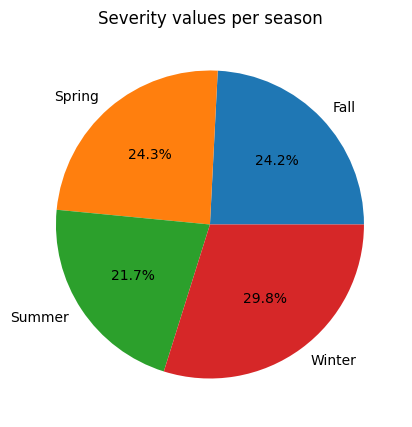

In [52]:
# plot the count of severity values per season as pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(df_us_final_new.groupby('Season')['Severity'].count(),labels=['Fall','Spring','Summer','Winter'],autopct='%1.1f%%')
plt.title('Severity values per season')
plt.show()

In [53]:
# store the above values in a temporary data frame
temp = df_us_final.groupby('Season')['Severity'].value_counts().to_frame()
# reset the index
temp.reset_index(inplace=True)
# rename the column
temp.rename(columns={'Severity':'Count'},inplace=True)
# print the temporary data frame
print(temp)

    Season  Count  count
0     Fall      2  17551
1     Fall      4  15367
2     Fall      3  14864
3     Fall      1   2771
4   Spring      1  30608
5   Spring      3  17331
6   Spring      4  16561
7   Spring      2  14059
8   Summer      1  31995
9   Summer      3  16270
10  Summer      4  13879
11  Summer      2  12680
12  Winter      2  21543
13  Winter      4  20027
14  Winter      3  17369
15  Winter      1    460


In [54]:
# combine the season and severity values
temp['Season_Severity'] = temp['Season'] + '_' + temp['Count'].astype(str)
# print the temporary data frame
print(temp)

    Season  Count  count Season_Severity
0     Fall      2  17551          Fall_2
1     Fall      4  15367          Fall_4
2     Fall      3  14864          Fall_3
3     Fall      1   2771          Fall_1
4   Spring      1  30608        Spring_1
5   Spring      3  17331        Spring_3
6   Spring      4  16561        Spring_4
7   Spring      2  14059        Spring_2
8   Summer      1  31995        Summer_1
9   Summer      3  16270        Summer_3
10  Summer      4  13879        Summer_4
11  Summer      2  12680        Summer_2
12  Winter      2  21543        Winter_2
13  Winter      4  20027        Winter_4
14  Winter      3  17369        Winter_3
15  Winter      1    460        Winter_1


<Axes: xlabel='Season', ylabel='count'>

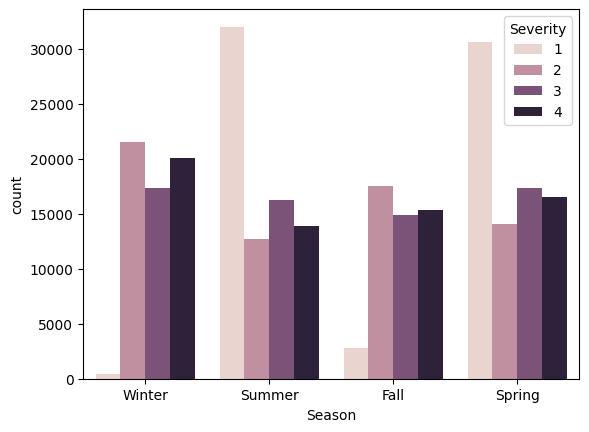

In [55]:
# consider the severity 4 and severity 3 data points
# plot the severity 4 and severity 3 data points vs the season
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Season',hue='Severity',data=df_us_final)

In [125]:
# split the data into four seasons for df_us_final
fall_df = df_us_final[df_us_final['Season']=='Fall']
spring_df = df_us_final[df_us_final['Season']=='Spring']
summer_df = df_us_final[df_us_final['Season']=='Summer']
winter_df = df_us_final[df_us_final['Season']=='Winter']

In [57]:
# fit a random forest classifier with weight balancing
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')

# split the data into train and test
from sklearn.model_selection import train_test_split
features = Features
X_winter = winter_df[features]
y_winter = winter_df['Severity']

# split the data into train and test using k fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=412)
for train_index, test_index in kf.split(X_winter):
    X_train_w, X_test_w = X_winter.iloc[train_index], X_winter.iloc[test_index]
    y_train_w, y_test_w = y_winter.iloc[train_index], y_winter.iloc[test_index]
    rfc.fit(X_train_w, y_train_w)
    y_pred_w = rfc.predict(X_test_w)
    print(confusion_matrix(y_test_w, y_pred_w))
    # accuracy
    print((y_pred_w==y_test_w).mean())

[[  46   17   32    0]
 [   4 2536  722 1049]
 [  12  356 2630  422]
 [   0  639  117 3298]]
0.7163299663299664
[[  28   15   46    1]
 [   6 2542  683 1114]
 [   7  339 2693  496]
 [   0  645  113 3152]]
0.7083333333333334
[[  37   16   41    0]
 [   4 2572  707 1070]
 [  11  358 2560  489]
 [   1  657  129 3228]]
0.7068181818181818
[[  36   13   36    1]
 [   7 2603  689 1067]
 [   8  361 2689  441]
 [   0  620  116 3193]]
0.7172558922558923
[[  38   17   37    3]
 [   2 2446  705 1015]
 [   5  388 2645  459]
 [   2  667  115 3335]]
0.7125178887111709


In [58]:
# best confusion matrix for winter
conf_mat_w = [[45,15,35,0],[2,2554,719,1036],[10,358,2636,416],[0,631,116,3307]]
# RMSE for winter
print(cost_of_misclassification(conf_mat_w))

67734


In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and labels
X = winter_df[Features] # Features
y = winter_df['Severity']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# change the labels to 0-3
y_train = y_train - 1
y_val = y_val - 1

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [127]:
# unique values in the labels
y_train.unique()


array([1, 3, 2, 0])

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Optional dropout layer for regularization
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Adjust output units for your multiclass problem
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)


Epoch 1/20
1485/1485 [==============================] - 1s 698us/step - loss: 1.0580 - accuracy: 0.4896 - val_loss: 0.9875 - val_accuracy: 0.5501
Epoch 2/20
1485/1485 [==============================] - 1s 623us/step - loss: 0.9906 - accuracy: 0.5401 - val_loss: 0.9332 - val_accuracy: 0.5859
Epoch 3/20
1485/1485 [==============================] - 1s 637us/step - loss: 0.9498 - accuracy: 0.5705 - val_loss: 0.8952 - val_accuracy: 0.6097
Epoch 4/20
1485/1485 [==============================] - 1s 617us/step - loss: 0.9155 - accuracy: 0.5949 - val_loss: 0.8639 - val_accuracy: 0.6348
Epoch 5/20
1485/1485 [==============================] - 1s 619us/step - loss: 0.8924 - accuracy: 0.6071 - val_loss: 0.8578 - val_accuracy: 0.6340
Epoch 6/20
1485/1485 [==============================] - 1s 620us/step - loss: 0.8772 - accuracy: 0.6156 - val_loss: 0.8383 - val_accuracy: 0.6429
Epoch 7/20
1485/1485 [==============================] - 1s 620us/step - loss: 0.8635 - accuracy: 0.6231 - val_loss: 0.8234 -

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Assuming 'model' is your trained ResNet model
predictions = model.predict(X_val)

# Convert one-hot encoded predictions and true labels back to categorical values
y_pred_classes = np.argmax(predictions, axis=-1)
y_true = y_val

# unique values in the y_true and y_pred_classes
print(np.unique(y_true))
print(np.unique(y_pred_classes))


# convert the y_true to a list
y_true = y_true.tolist()

# calculate the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
print(conf_mat)

# misclassification cost for winter
print(cost_of_misclassification(conf_mat))

372/372 [==============================] - 0s 336us/step
[0 1 2 3]
[0 1 2 3]
[[   2   28   61    3]
 [   1 2180  835 1287]
 [   1  402 2556  484]
 [   1  679  242 3118]]
69178


In [130]:
# Hyperparameter tuning for winter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Define a function to create the model
def create_model(neurons=128, dropout_rate=0.5, learning_rate=0.001, optimizer='adam', activation='relu'):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(64, activation=activation),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters to tune
neurons_values = [64, 128, 256]
dropout_rate_values = [0.3, 0.5, 0.7]
learning_rate_values = [0.001, 0.01]
optimizer_values = ['adam', 'rmsprop']
activation_values = ['relu', 'tanh']

best_accuracy = 0
best_params = {}

# Perform manual hyperparameter tuning
for neurons in neurons_values:
    for dropout_rate in dropout_rate_values:
        for learning_rate in learning_rate_values:
            for optimizer in optimizer_values:
                for activation in activation_values:
                    model = create_model(neurons=neurons, dropout_rate=dropout_rate,
                                         learning_rate=learning_rate, optimizer=optimizer, activation=activation)
                    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)
                    y_pred = model.predict(X_val)
                    accuracy = accuracy_score(y_val, y_pred.argmax(axis=-1))
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'neurons': neurons, 'dropout_rate': dropout_rate,
                                       'learning_rate': learning_rate, 'optimizer': optimizer,
                                       'activation': activation}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


372/372 [==============================] - 0s 386us/step
Best Parameters: {'neurons': 256, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'optimizer': 'adam', 'activation': 'relu'}
Best Accuracy: 0.6608585858585858


In [131]:
# train the model with the best parameters
model = create_model(neurons=best_params['neurons'], dropout_rate=best_params['dropout_rate'],
                     learning_rate=best_params['learning_rate'], optimizer=best_params['optimizer'],
                     activation=best_params['activation'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=0)

# predict the values for test data
y_pred = model.predict(X_val)

# convert the y_true to a list
y_true = y_val.tolist()

# calculate the confusion matrix
conf_mat_1 = confusion_matrix(y_true, y_pred.argmax(axis=-1))
print(conf_mat_1)


372/372 [==============================] - 0s 345us/step
[[   5   23   64    2]
 [   0 2277  883 1143]
 [   2  388 2579  474]
 [   1  810  321 2908]]


In [133]:
# display difference between y_true and y_pred
print(y_true)
print(y_pred.argmax(axis=-1))
# check size of y_true and y_pred
print(len(y_true))
print(len(y_pred.argmax(axis=-1)))

[1, 1, 3, 3, 1, 1, 2, 2, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1, 2, 1, 1, 1, 3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1, 1, 1, 3, 3, 2, 1, 1, 2, 3, 2, 2, 1, 3, 2, 2, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 3, 3, 2, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 2, 3, 3, 2, 1, 2, 1, 1, 3, 1, 2, 1, 3, 2, 3, 2, 2, 1, 3, 2, 1, 3, 1, 1, 3, 3, 1, 1, 3, 2, 3, 2, 1, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 2, 1, 2, 3, 3, 3, 1, 2, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 2, 1, 2, 1, 2, 2, 2, 3, 0, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 3, 1, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 3, 3, 2, 3, 2, 1, 1, 3, 1, 3, 1, 2, 2, 3, 3, 3, 1, 2, 1, 1, 2, 3, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 1, 3, 3, 1, 1, 3, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 

In [134]:
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Define your custom metric function
def custom_metric(y_true, y_pred):
    return np.sum(np.abs(y_pred**2 - y_true**2))

In [137]:
# chnge the y_true and y_pred to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred.argmax(axis=-1))

# Calculate the custom metric score for the y_true and y_pred
print(custom_metric(y_true, y_pred))
# divide by the length of y_true
print(custom_metric(y_true, y_pred)/len(y_true))

33485
2.8186026936026938


In [138]:
# Using neural Network for the remaining three seasons
rest_df = df_us_final[df_us_final['Season']!='Winter']
# head
print(rest_df.head())
# shape
print(rest_df.shape)

            ID   Source           Start_Time             End_Time  Start_Lat  \
51721  A-51722  Source2  2016-07-27 09:00:18  2016-07-27 09:30:18  33.885597   
72804  A-72811  Source2  2016-11-17 07:16:50  2016-11-17 08:05:05  34.102913   
76810  A-76817  Source2  2016-09-13 15:39:19  2016-09-13 16:24:19  34.273643   
82705  A-82712  Source2  2016-10-10 12:30:22  2016-10-10 13:15:22  33.983631   
89984  A-89991  Source2  2016-08-16 09:17:53  2016-08-16 09:55:00  33.257355   

        Start_Lng  Distance(mi)  \
51721 -118.143425          0.00   
72804 -118.194695          0.01   
76810 -118.038506          0.00   
82705 -117.890190          0.00   
89984 -117.080429          0.00   

                                             Description             Street  \
51721  Accident on Mayne St both ways between Hayter ...           Mayne St   
72804  Right hand shoulder blocked due to accident on...           CA-110 N   
76810  Accident on CA-2 Angeles Crest Hwy near Upper ...  Angeles Crest

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and labels
X_r = rest_df[Features] # Features
y_r = rest_df['Severity']

# Split data into training and validation sets
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_r, y_r, test_size=0.2, random_state=412)

# change the labels to 0-3
y_train_r = y_train_r - 1
y_val_r = y_val_r - 1

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_val_r = scaler.transform(X_val_r)

# train the model with the best parameters
model = create_model(neurons=best_params['neurons'], dropout_rate=best_params['dropout_rate'],
                     learning_rate=best_params['learning_rate'], optimizer=best_params['optimizer'],
                     activation=best_params['activation'])

history = model.fit(X_train_r, y_train_r, validation_data=(X_val_r, y_val_r), epochs=20, batch_size=32, verbose=0)

# predict the values for test data
y_pred_r = model.predict(X_val_r)

# convert the y_true to a list
y_true_r = y_val_r.tolist()

# calculate the confusion matrix
conf_mat_r = confusion_matrix(y_true_r, y_pred_r.argmax(axis=-1))
print(conf_mat_r)

1275/1275 [==============================] - 0s 346us/step
[[11365   230  1331   392]
 [ 1565  3165  1389  2779]
 [ 2092   529  5683  1265]
 [  544  1031   581  6847]]


In [140]:
# chnge the y_true and y_pred to numpy arrays
y_true_r = np.array(y_true_r)
y_pred_r = np.array(y_pred_r.argmax(axis=-1))

# Calculate the custom metric score for the y_true and y_pred
print(custom_metric(y_true_r, y_pred_r))
# divide by the length of y_true
print(custom_metric(y_true_r, y_pred_r)/len(y_true_r))

69375
1.700867902324213


In [141]:
# length of y_true_r
print(len(y_true_r))

40788
